## 1.2 단순회귀모형

In [1]:
library(tidyverse) 
library(showtext)
showtext_auto()
font_add_google("Nanum Gothic", "nanumgothic")

─ Attaching packages ──────────────────────────────── tidyverse 1.3.0 ─

✔ ggplot2 3.3.3     ✔ purrr   0.3.4
✔ tibble  3.0.6     ✔ dplyr   1.0.5
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

─ Conflicts ────────────────────────────────── tidyverse_conflicts() ─
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Loading required package: sysfonts

Loading required package: showtextdb



In [2]:
market = read.table('market-1.txt', header=T)
head(market)

,ID,X,Y
,<int>,<dbl>,<dbl>
1,1,4.2,9.3
2,2,8.5,18.5
3,3,9.3,22.8
4,4,7.5,17.7
5,5,6.3,14.6
6,6,12.2,27.9


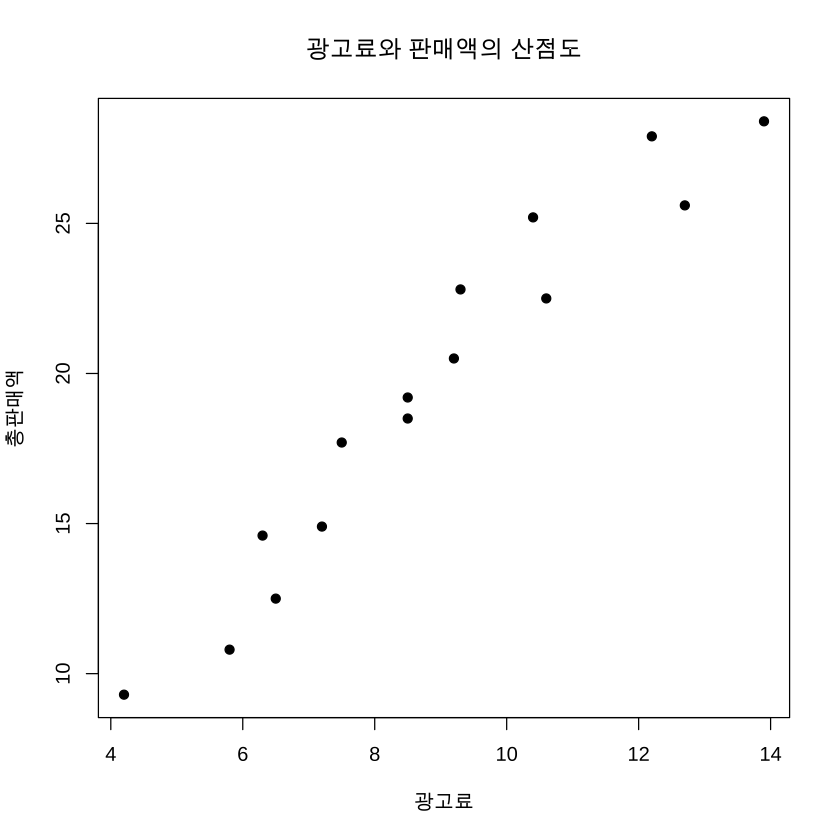

In [3]:
plot(market$X, market$Y, xlab='광고료', ylab='총판매액', pch=19)
title('광고료와 판매액의 산점도')

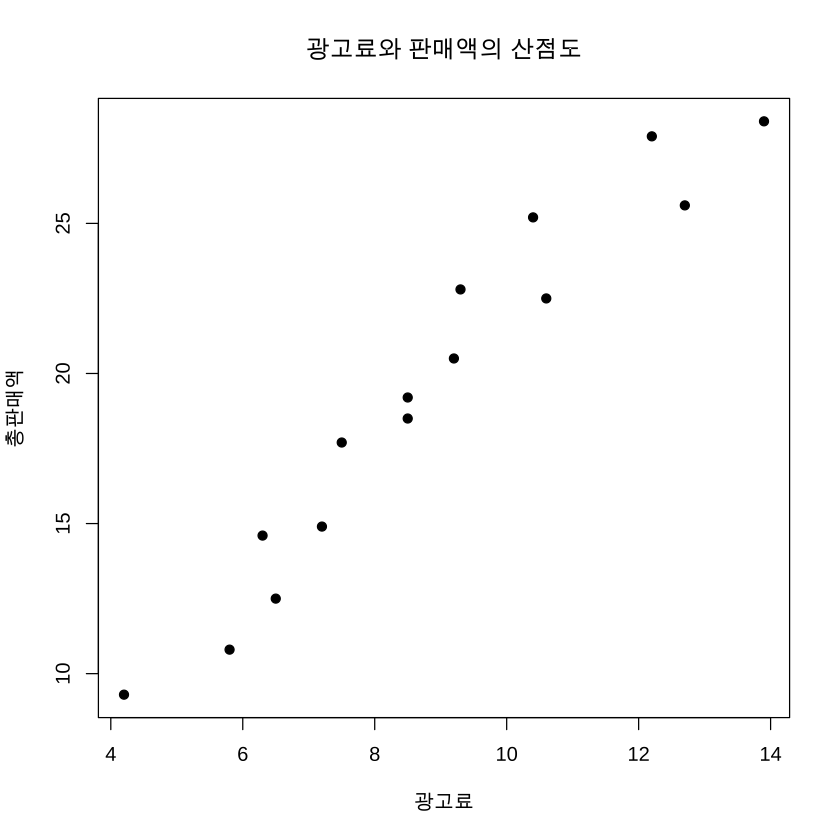

In [4]:
attach(market)
plot(X, Y, xlab='광고료', ylab='총판매액', pch=19)
title('광고료와 판매액의 산점도')

## 1.3 회귀선의 추정

식 1.4를 $\beta_0$와 $\beta_1$에 편미분하면 다음과 같다.

$ \dfrac{\partial S}{\partial\beta_0}=-2\sum(Y_i-\beta_0-\beta_1X_i)=0 $, &nbsp;&nbsp;
$ \dfrac{\partial S}{\partial\beta_1}=-2\sum(Y_i-\beta_0-\beta_1X_i)X_i=0 $

첫 번째 식에서 $\beta_0$를 $b_0$로 바꾸고 $\beta_1$을 $b_1$으로 바꾸어 식을 정리하면 다음과 같다.

$ \sum Y_i-\sum b_0-\sum b_1X_i=0 $

$ \sum b_0=\sum Y_i-\sum b_1 X_i $

$\sum b_0=n b_0$이고 $\sum Y_i=n\bar{Y}, \sum X_i=n\bar{X}$이므로

$ n b_0=n\bar{Y}-nb_1\bar{X} $

$ b_0=\bar{Y}-b_1\bar{X} $

이 된다. 마찬가지로 두 번째 식을 정리하면 다음과 같다.

$ \sum X_iY_i-\sum b_0X_i-\sum b_1X_i^2=0 $

$b_0$를 앞에서 구한 식으로 대체하면 다음과 같다.

$ \sum X_iY_i-\sum (\bar{Y}-b_1\bar{X})X_i-\sum b_1X_i^2=0 $

$ \sum X_iY_i-\sum X_i\bar{Y}+\sum b_1X_i\bar{X}-\sum b_1X_i^2=0 $

$ \sum X_iY_i-\sum X_i\bar{Y}-b_1(\sum X_i^2-\sum X_i\bar{X})=0 $

$ b_1=\dfrac{\sum X_iY_i-\sum X_i\bar{Y}}{\sum X_i^2-\sum X_i\bar{X}} $

여기에서 $\sum \bar{X}\bar{Y}-\sum \bar{X}Y_i=n\bar{X}\bar{Y}-\bar{X}n\bar{Y}=0$ 이고, 
$\sum \bar{X}^2-\sum X_i\bar{X}=n\bar{X}^2-n\bar{X}\bar{X}=0 $이므로 두 식을 앞에서 구한 $b_1$ 공식의 분자와 분모에 더하여 다음과 같이 쓸 수 있다.

$ b_1=\dfrac{\sum X_iY_i-\sum X_i\bar{Y}+\sum \bar{X}\bar{Y}-\sum \bar{X}Y_i}{\sum X_i^2-\sum X_i\bar{X}+\sum \bar{X}^2-\sum X_i\bar{X}}=
\dfrac{\sum X_i(Y_i-\bar{Y})-\sum\bar{X}(Y_i-\bar{Y})}{\sum X_i^2-2\sum X_i\bar{X}+\sum \bar{X}^2}=
\dfrac{\sum (X_i-\bar{X})(Y_i-\bar{Y})}{\sum (X_i-\bar{X})^2}
$

In [5]:
market.lm = lm(Y~X, data=market)
summary(market.lm)


Call:
lm(formula = Y ~ X, data = market)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.02908 -1.35349 -0.05685  0.98903  2.51517 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   0.3282     1.4302   0.229    0.822    
X             2.1497     0.1548  13.889 3.55e-09 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.587 on 13 degrees of freedom
Multiple R-squared:  0.9369,	Adjusted R-squared:  0.932 
F-statistic: 192.9 on 1 and 13 DF,  p-value: 3.554e-09


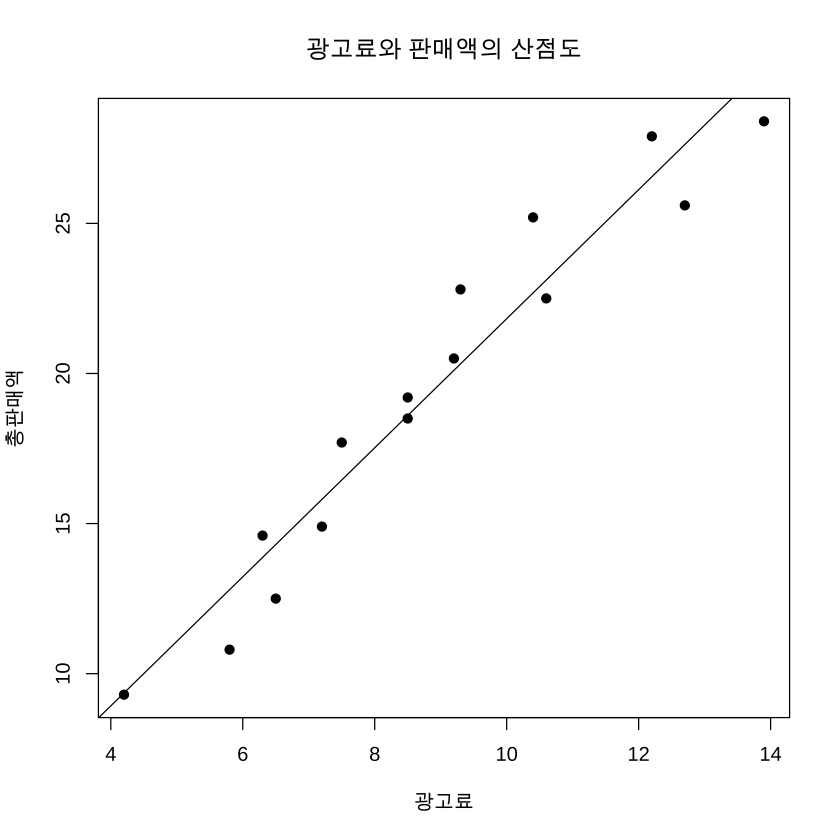

In [6]:
plot(market$X, market$Y, xlab="광고료", ylab='총판매액', pch=19)
title('광고료와 판매액의 산점도')
abline(market.lm)
# identify(market$X, market$Y)

In [7]:
names(market.lm)

[1] "coefficients"  "residuals"     "effects"       "rank"         
 [5] "fitted.values" "assign"        "qr"            "df.residual"  
 [9] "xlevels"       "call"          "terms"         "model"

In [8]:
resid = market.lm$residuals
fitted = market.lm$fitted.values

In [9]:
sum(resid)

[1] -2.359224e-15

In [10]:
sum(fitted)

[1] 290.4

In [11]:
sum(market$Y)

[1] 290.4

$\sum X_i e_i = 0$

In [12]:
sum(market$X * resid)

[1] -1.86795e-14

$\sum \hat{Y}e_i=0$

In [13]:
sum(fitted * resid)

[1] -4.82947e-14

In [14]:
xbar = mean(market$X)
ybar = mean(market$Y)
print(xbar)
print(ybar)

[1] 8.853333
[1] 19.36


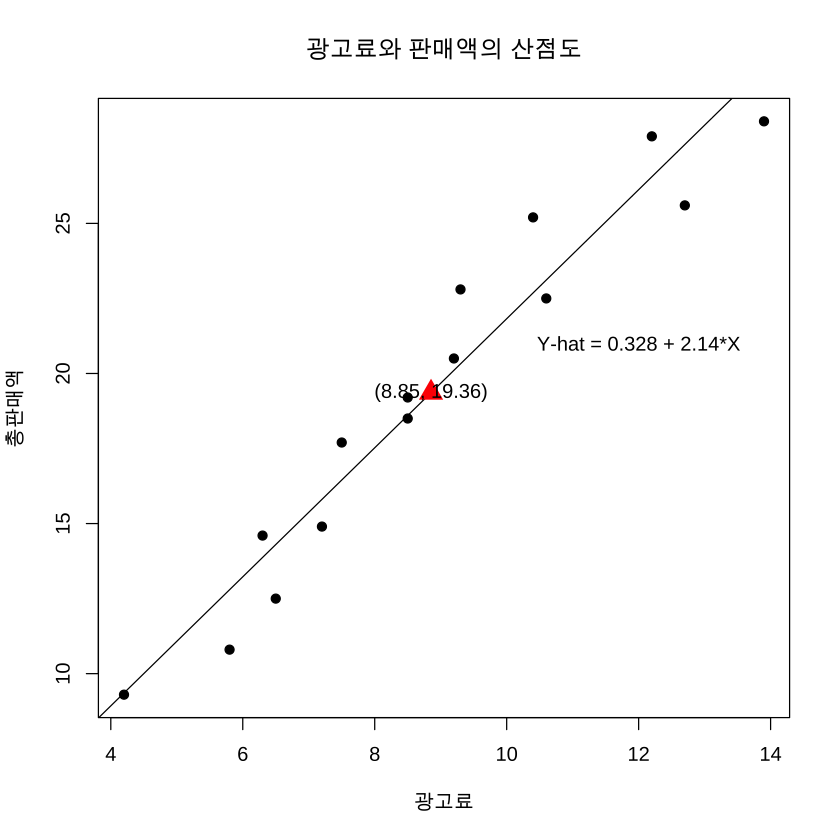

In [15]:
plot(market$X, market$Y, xlab="광고료", ylab='총판매액', pch=19)
title('광고료와 판매액의 산점도')
abline(market.lm)

points(xbar, ybar, pch=17, cex=2.0, col='RED')
text(xbar, ybar, '(8.85, 19.36)')
fx = 'Y-hat = 0.328 + 2.14*X'
text(12, 21, fx)  # text(locator(1), fx) 마우스를 사용해 위치 선택

## 1.4 회귀 모형의 정도

### 1.4.1

In [16]:
# 샘플 개수 15개, 잔차의 자유도 15-2=13
anova(market.lm)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
X,1,485.57264,485.572638,192.9033,3.553647e-09
Residuals,13,32.72336,2.517182,NA,NA


$F_0 > F(1, 13; 0.05)$이므로 귀무가설 $H_0:\beta_1=0$을 기각한다.

In [17]:
# F(1, 13; 0.05)
qf(0.95, 1, 13)

[1] 4.667193

$p$-값이 $\alpha=0.05$ 보다 매우 작으므로 귀무가설을 기각한다.

In [18]:
# p-value
1 - pf(192.9, 1, 13)

[1] 3.554018e-09

### 1.4.2

$R^2=\dfrac{SSR}{SST}=1-\dfrac{SSE}{SST}$

In [19]:
anova(market.lm)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
X,1,485.57264,485.572638,192.9033,3.553647e-09
Residuals,13,32.72336,2.517182,NA,NA


In [20]:
# R^2
485.57264/(485.57264+32.72336)

[1] 0.9368636

### 1.4.3

In [21]:
summary(market.lm)


Call:
lm(formula = Y ~ X, data = market)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.02908 -1.35349 -0.05685  0.98903  2.51517 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   0.3282     1.4302   0.229    0.822    
X             2.1497     0.1548  13.889 3.55e-09 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.587 on 13 degrees of freedom
Multiple R-squared:  0.9369,	Adjusted R-squared:  0.932 
F-statistic: 192.9 on 1 and 13 DF,  p-value: 3.554e-09


$s = \sqrt{MSE}$

In [22]:
# Residual standard error: 1.587 = sqrt(Mean Sq)
sqrt(2.517182)

[1] 1.586563

### 1.4.4

$r = \sqrt{R^2}$

## 1.5 단순회귀의 추정과 검정

### 1.5.1

$b_1 \pm t(n-2; \dfrac{\alpha}{2})\sqrt{\hat{Var}(b_1)}$

`qt()` : [스튜턴트 t 분포](https://ko.wikipedia.org/wiki/%EC%8A%A4%ED%8A%9C%EB%8D%98%ED%8A%B8_t_%EB%B6%84%ED%8F%AC) 함수

In [23]:
q.val = qt(0.975, 13)

$\beta_1$의 95% 신뢰구간

In [24]:
2.1497 - q.val*0.1548

[1] 1.815275

In [25]:
2.1497 + q.val*0.1548

[1] 2.484125

$\beta_0$의 95% 신뢰구간

In [26]:
0.3282 - q.val*1.4302

[1] -2.761559

In [27]:
0.3282 + q.val*1.4302

[1] 3.417959

### 1.5.2

In [28]:
pred.frame = data.frame(X=seq(3.5, 14.5, 0.2))

In [29]:
pc = predict(market.lm, int="c", newdata=pred.frame)  # 기댓값 신뢰구간
pp = predict(market.lm, int="p", newdata=pred.frame)  # 새로운 값 신뢰구간

In [30]:
head(pc, 3)

,fit,lwr,upr
1,7.852079,5.855247,9.848911
2,8.282014,6.344903,10.219125
3,8.711949,6.834076,10.589821


In [31]:
head(pp, 3)

,fit,lwr,upr
1,7.852079,3.885278,11.81888
2,8.282014,4.344937,12.21909
3,8.711949,4.803678,12.62022


In [32]:
pred.X = pred.frame$X
pred.X

[1]  3.5  3.7  3.9  4.1  4.3  4.5  4.7  4.9  5.1  5.3  5.5  5.7  5.9  6.1  6.3
[16]  6.5  6.7  6.9  7.1  7.3  7.5  7.7  7.9  8.1  8.3  8.5  8.7  8.9  9.1  9.3
[31]  9.5  9.7  9.9 10.1 10.3 10.5 10.7 10.9 11.1 11.3 11.5 11.7 11.9 12.1 12.3
[46] 12.5 12.7 12.9 13.1 13.3 13.5 13.7 13.9 14.1 14.3 14.5

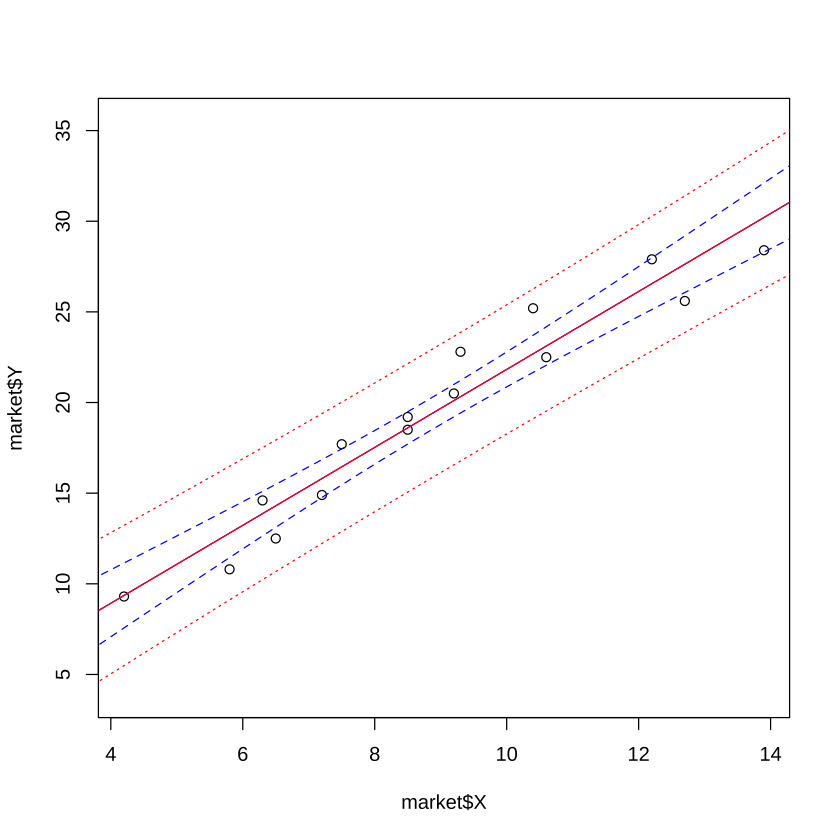

In [33]:
plot(market$X, market$Y, ylim=range(market$Y, pp))
matlines(pred.X, pc, lty=c(1,2,2), col="BLUE")
matlines(pred.X, pp, lty=c(1,3,3), col="RED")

### 1.5.3

In [34]:
summary(market.lm)


Call:
lm(formula = Y ~ X, data = market)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.02908 -1.35349 -0.05685  0.98903  2.51517 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   0.3282     1.4302   0.229    0.822    
X             2.1497     0.1548  13.889 3.55e-09 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.587 on 13 degrees of freedom
Multiple R-squared:  0.9369,	Adjusted R-squared:  0.932 
F-statistic: 192.9 on 1 and 13 DF,  p-value: 3.554e-09


In [35]:
t_0 = 2.1497 / 0.1548
t_0

[1] 13.88695

유의 수준 0.05 기각역

In [36]:
qt(0.975, 13)

[1] 2.160369

유의확률 p-값

In [37]:
2*(1-pt(13.889, 13))

[1] 3.553531e-09

## 1.6 가중 회귀

In [38]:
x = c(1,2,3,4,5)
y = c(2,3,5,8,7)
w = 1/x
w.lm = lm(y~x, weights=w)
summary(w.lm)


Call:
lm(formula = y ~ x, weights = w)

Weighted Residuals:
         1          2          3          4          5 
 8.108e-02 -3.249e-01 -1.076e-16  7.297e-01 -4.835e-01 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)  
(Intercept)   0.3784     0.6891   0.549   0.6212  
x             1.5405     0.2688   5.730   0.0106 *
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.5411 on 3 degrees of freedom
Multiple R-squared:  0.9163,	Adjusted R-squared:  0.8884 
F-statistic: 32.84 on 1 and 3 DF,  p-value: 0.01055


$\hat Y=0.3784+1.5405X$

## 1.7 분석 사례

In [39]:
super = read.table('supermarket.txt', header=T)
head(super, 3)

,price,time
,<dbl>,<dbl>
1,6.4,1.7
2,16.1,2.7
3,42.1,4.9


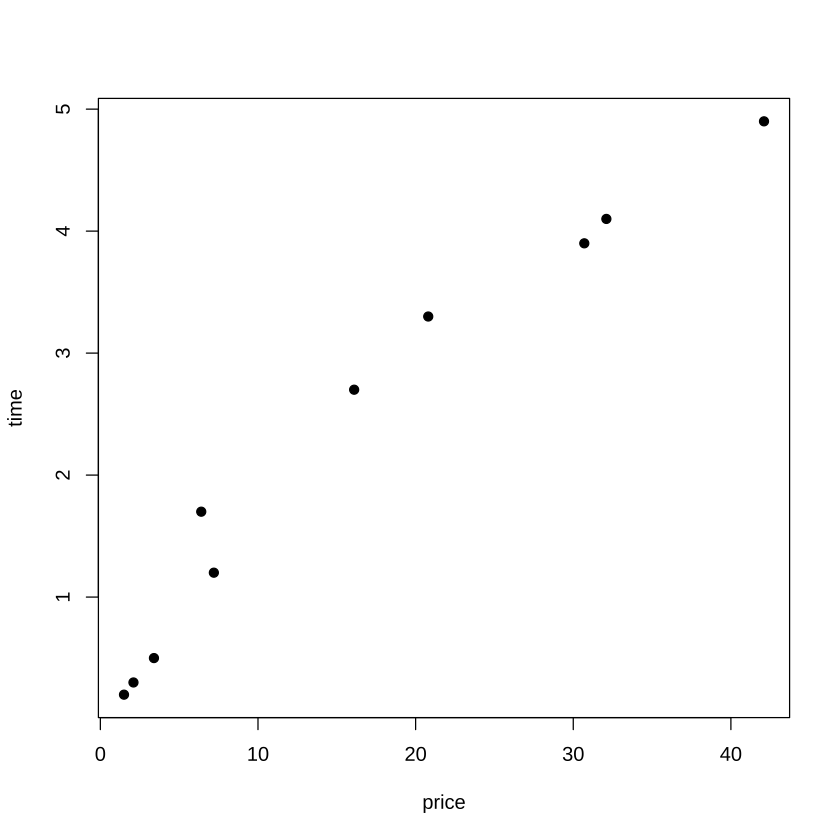

In [40]:
attach(super)
plot(price, time, pch=19)

In [41]:
super.lm = lm(time~price, data=super)
summary(super.lm)


Call:
lm(formula = time ~ price, data = super)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.37928 -0.32771 -0.04431  0.32231  0.56126 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 0.396460   0.191488    2.07   0.0722 .  
price       0.115982   0.008979   12.92 1.22e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.3925 on 8 degrees of freedom
Multiple R-squared:  0.9542,	Adjusted R-squared:  0.9485 
F-statistic: 166.9 on 1 and 8 DF,  p-value: 1.221e-06


$\hat{time}=0.396+0.116\times price$

In [42]:
anova(super.lm)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
price,1,25.703598,25.7035980,166.852,1.220793e-06
Residuals,8,1.232402,0.1540502,NA,NA


In [43]:
names(super.lm)

[1] "coefficients"  "residuals"     "effects"       "rank"         
 [5] "fitted.values" "assign"        "qr"            "df.residual"  
 [9] "xlevels"       "call"          "terms"         "model"

In [44]:
cbind(super, super.lm$resid, super.lm$fitted)

,price,time,super.lm$resid,super.lm$fitted
,<dbl>,<dbl>,<dbl>,<dbl>
1,6.4,1.7,0.56125840,1.138742
2,16.1,2.7,0.43623742,2.263763
3,42.1,4.9,-0.37928275,5.279283
4,2.1,0.3,-0.34002095,0.640021
5,30.7,3.9,-0.05709314,3.957093
6,32.1,4.1,-0.01946730,4.119467
7,7.2,1.2,-0.03152683,1.231527
8,3.4,0.5,-0.29079696,0.790797
9,20.8,3.3,0.49112416,2.808876


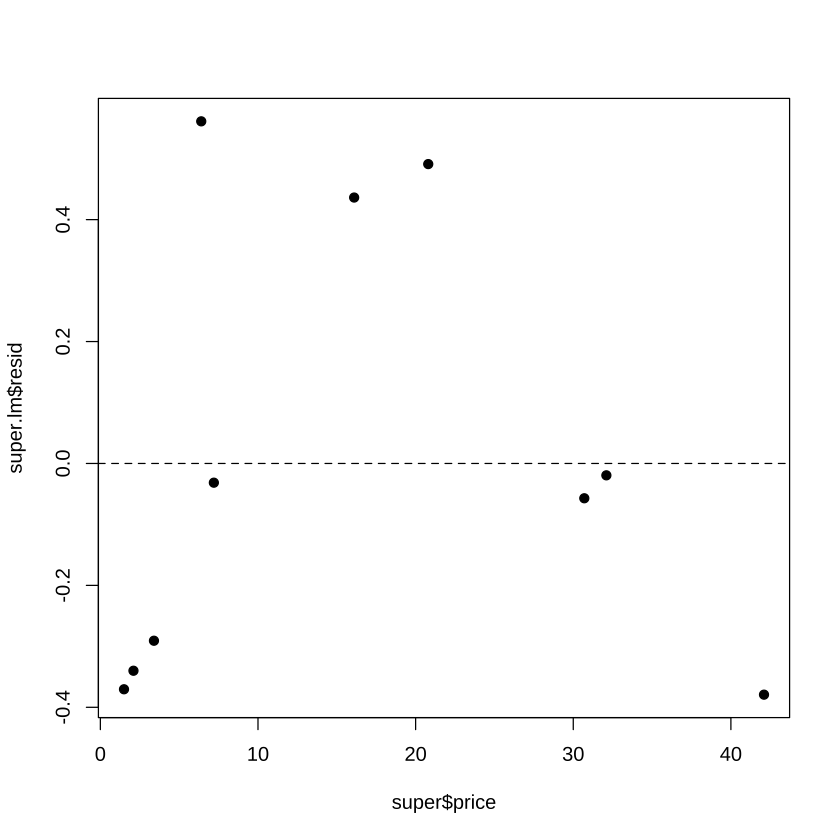

In [45]:
plot(super$price, super.lm$resid, pch=19)
abline(h=0, lty=2)

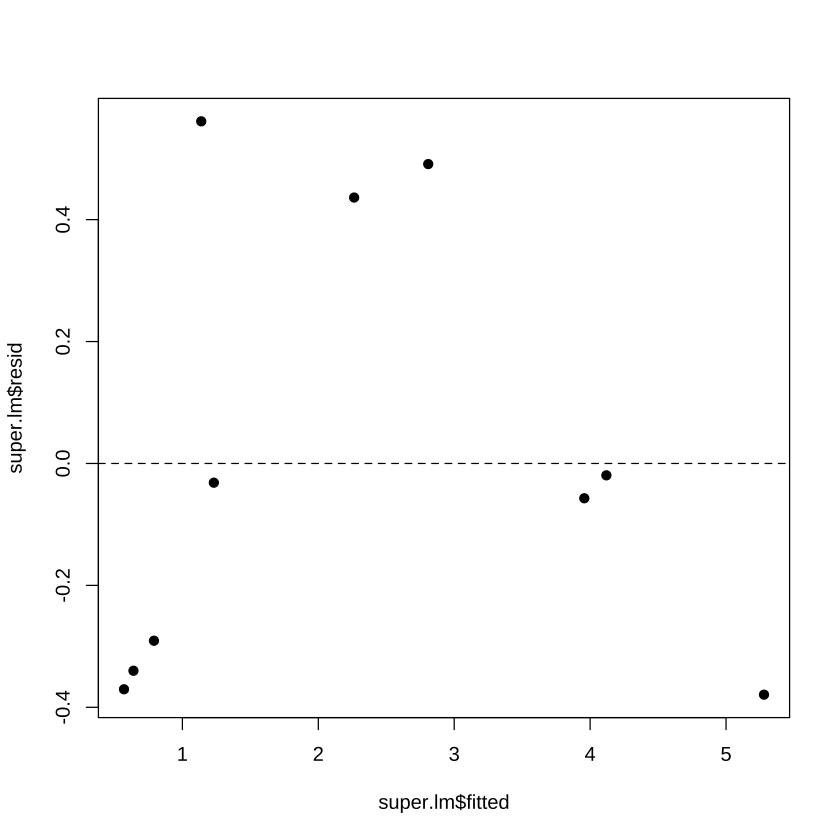

In [46]:
plot(super.lm$fitted, super.lm$resid, pch=19)
abline(h=0, lty=2)

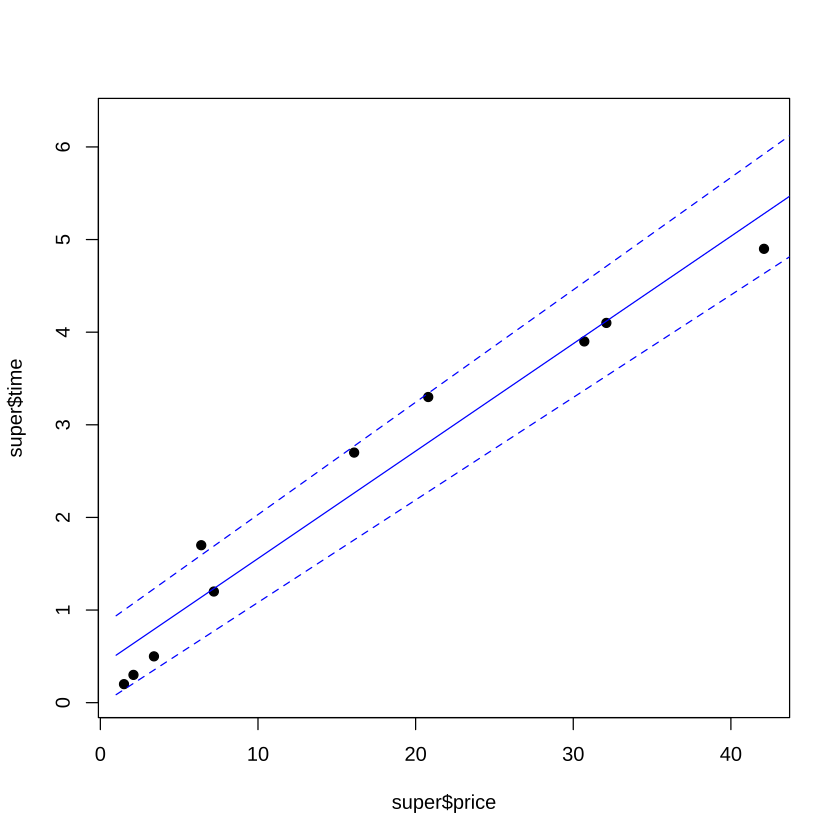

In [48]:
p.x = data.frame(price=c(1,45))
pc = predict(super.lm, int="c", newdata=p.x)
pred.x = p.x$price
plot(super$price, super$time, ylim=range(super$time, pc), pch=19)
matlines(pred.x, pc, lty=c(1,2,2), col='BLUE')